EEG MI Analysis
=================

### Overview
This notebook provides a comprehensive analysis of EEG data for Motor Imagery (MI) tasks, focusing

### Importing Libraries

In [251]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import os
from ERDCalculator.ERDCalculator import ERDCalculator 

### Load the raw EEG data

In [252]:
import re

def extract_conditions_from_file(filepath):
    """
    Extracts conditions in order from a given text file.

    Args:
        filepath (str): The path to the input text file.

    Returns:
        list: A list of strings, where each string is a condition extracted
              from the file in the order they appear.
    """
    conditions = []
    # Regular expression to find the "Condition: " followed by the condition name
    # It captures the word after "Condition: " until a space or the next comma/parenthesis
    condition_pattern = re.compile(r"Condition:\s*([^,\s(]+)")

    try:
        with open(filepath, 'r') as f:
            for line in f:
                match = condition_pattern.search(line)
                if match:
                    # The first capturing group contains the condition name
                    conditions.append(match.group(1))
    except FileNotFoundError:
        print(f"Error: The file '{filepath}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return conditions

In [253]:
order_list = extract_conditions_from_file('./yonas.txt')
print("Extracted conditions in order:", order_list)

Extracted conditions in order: ['sixth', 'blank', 'sixth', 'blank', 'sixth', 'blank', 'pinky', 'ring', 'pinky', 'sixth', 'blank', 'thumb', 'ring', 'blank', 'sixth', 'blank', 'sixth', 'ring', 'blank', 'sixth', 'index', 'blank', 'index', 'sixth', 'blank', 'sixth', 'blank', 'sixth', 'blank', 'middle', 'blank', 'thumb', 'blank', 'pinky', 'sixth', 'blank', 'sixth', 'index', 'blank', 'sixth', 'middle', 'middle', 'sixth', 'thumb', 'sixth', 'blank', 'index', 'middle', 'sixth', 'blank', 'index', 'blank', 'ring', 'sixth', 'index', 'sixth', 'thumb', 'sixth', 'blank', 'sixth', 'blank', 'sixth', 'blank', 'sixth', 'ring', 'pinky', 'sixth', 'middle', 'blank', 'sixth', 'middle', 'blank', 'thumb', 'ring', 'blank', 'sixth', 'blank', 'sixth', 'pinky', 'blank', 'sixth', 'blank', 'sixth', 'blank', 'thumb', 'pinky', 'sixth', 'blank', 'sixth', 'blank', 'middle', 'blank', 'sixth', 'pinky', 'blank', 'pinky', 'blank', 'sixth', 'blank', 'sixth', 'ring', 'sixth', 'blank', 'sixth', 'pinky', 'middle', 'sixth', 'bla

In [254]:
PARTICIPANT = 'Rahul'

In [255]:
if PARTICIPANT == 'Yonas':

    data_dir = './data/rawdata/Yonas/'
    raw_data = mne.io.read_raw_brainvision(os.path.join(data_dir,'Natty1.vhdr'), preload=True, verbose=False) 
    events, event_id = mne.events_from_annotations(raw_data, verbose=False)
    sfreq = raw_data.info['sfreq']
    channel_names = raw_data.ch_names
    n_channels = len(channel_names)
    highpass = raw_data.info['highpass']
    lowpass = raw_data.info['lowpass']

    print(f"Sampling Frequency: {sfreq} Hz")
    print(f"Number of Channels: {n_channels}")
    print(f"Highpass Filter: {highpass} Hz")
    print(f"Lowpass Filter: {lowpass} Hz")
    
    events_df = pd.DataFrame(events, columns=['onset', 'duration', 'description'])
    events_df = events_df[events_df['description'] == 10]
    events_df['onset'] = (events_df['onset'] + sfreq*3).astype(int)
    events_df['description_details'] = order_list

    events_map = {
        "sixth": 6,
        "thumb": 1,
        "index": 2,
        "middle": 3,
        "ring": 4,
        "pinky": 5,
        "blank": 7
    }

    events_df['description'] = events_df['description_details'].map(lambda x: events_map.get(x, 0))
    events_df.reset_index(inplace=True, drop=True)
    events_df.drop(columns=['description_details'], inplace=True)
    events , event_id = events_df.values, events_map



if PARTICIPANT == 'Nate':
    data_dir = './data/rawdata/Nate/'
    raw_data = mne.io.read_raw_brainvision(os.path.join(data_dir,'TEST_NATTY.vhdr'), preload=True, verbose=False) 
    events, event_id = mne.events_from_annotations(raw_data, verbose=False)
    sfreq = raw_data.info['sfreq']
    channel_names = raw_data.ch_names
    n_channels = len(channel_names)
    highpass = raw_data.info['highpass']
    lowpass = raw_data.info['lowpass']

    print(f"Sampling Frequency: {sfreq} Hz")
    print(f"Number of Channels: {n_channels}")
    print(f"Highpass Filter: {highpass} Hz")
    print(f"Lowpass Filter: {lowpass} Hz")
    events_df = pd.DataFrame(events, columns=['onset', 'duration', 'description'])
    events_df = events_df[events_df['description'].isin(list(range(1,8)))]
    events_map = {
        "sixth": 6,
        "thumb": 1,
        "index": 2,
        "middle": 3,
        "ring": 4,
        "pinky": 5,
        "blank": 7
    }
    events , event_id = events_df.values, events_map

if PARTICIPANT == 'Rahul':
    data_dir = './data/rawdata/Rahul/'
    raw_data = mne.io.read_raw_brainvision(os.path.join(data_dir,'test_blank.vhdr'), preload=True, verbose=False) 
    events, event_id = mne.events_from_annotations(raw_data, verbose=False)
    sfreq = raw_data.info['sfreq']
    channel_names = raw_data.ch_names
    n_channels = len(channel_names)
    highpass = raw_data.info['highpass']
    lowpass = raw_data.info['lowpass']

    print(f"Sampling Frequency: {sfreq} Hz")
    print(f"Number of Channels: {n_channels}")
    print(f"Highpass Filter: {highpass} Hz")
    print(f"Lowpass Filter: {lowpass} Hz")
    
    events_df = pd.DataFrame(events, columns=['onset', 'duration', 'description'])
    events_df = events_df[events_df['description'].isin(list(range(1,8)))]
    events_map = {
        "sixth": 6,
        "thumb": 1,
        "index": 2,
        "middle": 3,
        "ring": 4,
        "pinky": 5,
        "blank": 7
    }
    events , event_id = events_df.values, events_map
        

Sampling Frequency: 250.0 Hz
Number of Channels: 63
Highpass Filter: 0.0 Hz
Lowpass Filter: 69.0 Hz


### Configurations for preprocessing

In [256]:
focus_channel_names = ["C3", "C1", "CP3", "CP1"]
bad_channels = ['FT9', 'TP9', 'FT10', 'TP10']  # Channels to drop
focus_channels_indices = [[i for i in channel_names if i not in bad_channels].index(ch) for ch in focus_channel_names if ch in channel_names]
data_df = raw_data.to_data_frame().drop(columns=['time']+ bad_channels)
markers_df = events_df.copy()

In [257]:
epoch_pre_stimulus_seconds = 2.0
epoch_post_stimulus_seconds = 2.0
bandpass_low = 8.0
bandpass_high = 30.0 # Alpha band

In [258]:
erd_calculator = ERDCalculator(
    sfreq,
    epoch_post_stimulus_seconds,
    epoch_post_stimulus_seconds,
    bandpass_low,
    bandpass_high,
    [i for i in channel_names if i not in bad_channels],
    focus_channels_indices
    )

### Function to process and calculate ERD values of the entire data

This function, `calculate_erd_for_all_markers`, processes EEG data around event markers to compute ERD values using various methods (e.g., bandpass, Welch, dB, moving average). It extracts each epoch, applies the chosen ERD method via an `ERDCalculator` object, and returns a list of ERD results either as per-channel or mean values.


In [259]:
def calculate_erd_for_all_markers(
    data_df,
    markers_df,
    erd_calculator,

    method='bandpass',
    per_channel=False,
    moving_average_window_size=100,
    moving_average_method='percentage',
):
    """
    Calculates Event-Related Desynchronization (ERD) for each marker in a DataFrame.

    This function iterates through provided event markers, extracts the corresponding
    data epoch, calculates the ERD value using the provided ERD calculator object, and
    returns a list of results. Supports multiple ERD computation methods.

    Args:
        data_df (pd.DataFrame): Continuous EEG data with samples as rows and channel names as columns.
        markers_df (pd.DataFrame): Event markers with 'onset' (in samples) and 'description' columns.
        erd_calculator (object): Instance of ERDCalculator with relevant methods and attributes.

        method (str): ERD computation method - one of 'bandpass', 'welch', 'db_correction', 'moving_average', or 'consecutive_windows'.
        per_channel (bool): If True, returns ERD values per channel. Otherwise, returns mean across focus channels.
        moving_average_window_size (int): Window size (in samples) for the moving average method.
        moving_average_method (str): Method to apply for moving average ('percentage' or 'db').

    Returns:
        list: A list of dictionaries, each with 'stimulus', 'erd_value' (and optionally 'channel' and 'epoch' keys).
    """
    results = []  # Store all final ERD results
    erds = None   # Optional to hold full moving-average ERD timeline (only for moving_average method)

    print(f"Starting ERD calculation for {len(markers_df)} markers...")

    # Loop over each marker in the provided markers DataFrame
    for index, row in markers_df.copy().iterrows():
        onset_sample = row['onset']
        stimulus_description = row['description']

        # Determine data slice around the marker (epoch)
        start_sample = onset_sample - erd_calculator.samples_before_marker
        end_sample = onset_sample + erd_calculator.samples_after_marker

        # Ensure the epoch window is within valid bounds of data
        if start_sample >= 0 and end_sample < len(data_df):
            # Extract the epoch and transpose to shape (n_channels, n_samples)
            epoch_data = data_df.iloc[start_sample:end_sample].values.T

            # Choose ERD calculation method
            if method == 'bandpass':
                erd_value = erd_calculator.calculate_erd_from_bandpass(epoch_data, return_mean=not per_channel)

            elif method == 'welch':
                erd_value = erd_calculator.calculate_erd_from_welch(epoch_data, return_mean=not per_channel)

            elif method == "db_correction":
                erd_value = erd_calculator.calculate_erd_from_db_correction(epoch_data, return_mean=not per_channel)

            elif method == 'moving_average':
                # Moving average requires a window size
                windowSize = moving_average_window_size
                try:
                    window_size_samples = int(windowSize)
                    erd_value, erds = erd_calculator.calculate_erd_moving_average(
                        epoch_data,
                        window_size_samples=window_size_samples,
                        return_mean=not per_channel,
                        method=moving_average_method
                    )
                except ValueError:
                    print(f"Invalid window size '{windowSize}'. Please enter a valid integer.")
                    continue

            else:
            # Handle unknown method input
                raise ValueError(f"Unknown method '{method}'. Supported methods are 'bandpass', 'welch', 'db_correction', 'moving_average', and 'consecutive_windows'.")

            # Append results based on whether mean or per-channel values were requested
            if erd_value is not None:
                if not per_channel:
                    if not np.isnan(erd_value):
                        results.append({
                            'stimulus': stimulus_description,
                            'erd_value': erd_value,
                            'erds': erds  # only populated for moving average
                        })
                else:
                    if isinstance(erd_value, dict):
                        for channel, value in erd_value.items():
                            results.append({
                                'epoch': index,
                                'stimulus': stimulus_description,
                                'channel': channel,
                                'erd_value': value
                            })
                    else:
                        print(f"Warning: Expected a dict for per_channel method, got {type(erd_value)}")

        else:
            print(f"Skipping epoch for '{stimulus_description}' at sample {onset_sample}: out of data bounds.")

    print(f"Finished ERD calculation. Successfully processed {len(results)} epochs.")
    return results


### Function to get summary of ERD values

Filters ERD values by category (NT, ST, Rest) and a threshold (boundary)

Computes mean, standard deviation, and valid count / total for each category

Returns a summary DataFrame formatted for readability

In [260]:
def get_summary(erd_results: pd.DataFrame, boundary, target_value='erd_value_2s'):
    """
    Summarizes ERD results by stimulus category based on a value threshold.

    Args:
        erd_results (pd.DataFrame): DataFrame containing ERD values and stimulus labels.
        boundary (float): Threshold to filter ERD values by sign (e.g., < 0 for desynchronization).
        target_value (str): Column name in erd_results to summarize. Defaults to 'erd_value_2s'.

    Returns:
        pd.DataFrame: A summary table with mean, standard deviation, and valid count for each category.
    """

    # Define stimulus categories and their associated stimulus codes
    STIMULUS_CATEGORIES = {
        'NT': {'stimulus_values': list(range(1, 6))},
        'ST': {'stimulus_values': [6]},
        'Rest': {'stimulus_values': [7]},
    }

    summary_data = []

    # Loop through each category and compute stats
    for category_name, conditions in STIMULUS_CATEGORIES.items():
        stim_values = conditions['stimulus_values']

        # Apply condition based on whether we're looking for values below or above the boundary
        if category_name in ['NT', 'ST']:
            filtered_df = erd_results[
                (erd_results[target_value] < boundary) &
                (erd_results['stimulus'].isin(stim_values))
            ]
        else:  # 'Rest' category: we expect positive ERD values (synchronization)
            filtered_df = erd_results[
                (erd_results[target_value] > boundary) &
                (erd_results['stimulus'].isin(stim_values))
            ]

        # Calculate summary statistics
        std_val = filtered_df[target_value].std()
        mean_val = filtered_df[target_value].mean()
        count_val = filtered_df[target_value].count()

        # Total number of trials for the category (including filtered-out ones)
        total_trials = len(erd_results[erd_results['stimulus'].isin(stim_values)])

        # Append stats to the summary list
        summary_data.append({
            'Category': category_name,
            'Mean': f'{mean_val:.3f}',
            'Std Dev': f'{std_val:.3f}',
            'Count': f'{count_val}/{total_trials} ({(count_val/total_trials*100):.2f}%)'
        })

    # Convert summary into a DataFrame for display
    summary_df = pd.DataFrame(summary_data)

    return summary_df

### Function to plot topographic maps of ERD values

This function creates EEG topomap plots for each stimulus condition from an MNE EpochsTFR object. It optionally shares the same color scale across all maps (for comparability), and supports baseline correction, frequency/time cropping, and other visual customization options.

In [261]:
def plot_tfr_topomaps_by_condition(tfr, topomap_kw=None, unify_color_scale=False):
    """
    Generates a grid of EEG topomap plots for each stimulus condition in a TFR object.

    Args:
        tfr (mne.time_frequency.EpochsTFR): Time-Frequency Representation object with all conditions.
        topomap_kw (dict, optional): Additional keyword arguments for MNE's plot_topomap.
        unify_color_scale (bool): If True, uses the same color scale across all topomaps
                                  with a shared colorbar. Default is False.

    Returns:
        fig (matplotlib.figure.Figure): The full figure with topomap plots.
        axes (np.ndarray): Array of matplotlib axes used in the plot.
    """

    # --- 1. Validation and setup ---
    if not isinstance(tfr, mne.time_frequency.EpochsTFR):
        raise TypeError(f"Input must be an MNE EpochsTFR object, got {type(tfr)}")

    # Get all stimulus condition names
    stimulus_names = list(tfr.event_id.keys())
    n_stimuli = len(stimulus_names)

    if n_stimuli == 0:
        print("No stimuli found in TFR object.")
        return None, None

    # Determine grid size for plotting
    n_cols = int(np.ceil(np.sqrt(n_stimuli)))
    n_rows = int(np.ceil(n_stimuli / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4.5), layout="constrained")
    if n_stimuli == 1:
        axes = np.array([axes])  # Ensure consistent indexing

    # --- 2. Set default plotting parameters ---
    default_kw = dict(
        ch_type="eeg", tmin=0, tmax=2, fmin=8.0, fmax=30.0,
        baseline=None, mode='mean', show=False, colorbar=True
    )

    # --- 3. If unifying color scale, calculate global min/max values ---
    if unify_color_scale:
        mode = default_kw.get('mode', 'mean')
        if mode != 'mean':
            raise NotImplementedError("unify_color_scale=True only supports mode='mean'")

        global_min, global_max = np.inf, -np.inf
        print("Calculating global color scale limits...")

        # Loop through all conditions to find global vmin/vmax
        for stimulus_name in stimulus_names:
            power = tfr[stimulus_name].average()

            # Optional baseline correction
            if default_kw.get('baseline') is not None:
                power.apply_baseline(default_kw['baseline'], mode=default_kw.get('baseline_mode', 'mean'))

            # Crop to desired time-frequency window
            power_cropped = power.copy().crop(
                tmin=default_kw['tmin'], tmax=default_kw['tmax'],
                fmin=default_kw['fmin'], fmax=default_kw['fmax']
            )

            # Get one value per channel by averaging over time and frequency
            topo_data = np.mean(power_cropped.data, axis=(1, 2))

            # Update global min and max
            global_min = min(global_min, topo_data.min())
            global_max = max(global_max, topo_data.max())

        print(f"Global limits found: vmin={global_min:.2f}, vmax={global_max:.2f}")
        default_kw['vlim'] = (global_min, global_max)
        default_kw['colorbar'] = False  # Turn off individual colorbars

        # Merge user-supplied topomap kwargs
        if topomap_kw:
            default_kw.update(topomap_kw)

    # --- 4. Generate topomap plots per condition ---
    for stimulus_name, ax in zip(stimulus_names, axes.flat):
        print(f"Processing and plotting stimulus: '{stimulus_name}'")
        power = tfr[stimulus_name].average()

        # Plot topomap for the averaged power over time-frequency window
        power.plot_topomap(axes=ax, **default_kw)
        ax.set_title(stimulus_name, fontsize=14)

    # Turn off unused axes if the grid has more slots than stimuli
    for ax in axes.flat[n_stimuli:]:
        ax.axis('off')

    # --- 5. Add unified colorbar if needed ---
    if unify_color_scale:
        norm = mpl.colors.Normalize(vmin=default_kw['vlim'][0], vmax=default_kw['vlim'][1])
        cmap = default_kw.get('cmap', 'RdBu_r')
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

        # Add one shared colorbar to the entire figure
        cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), shrink=0.8, pad=0.08)
        cbar_label = default_kw.get('mode', 'Power').capitalize()
        cbar.set_label(cbar_label, rotation=270, labelpad=15)

    plt.show()
    return fig, axes


### Running Analysis

This code runs ERD analysis using four different methods (`bandpass`, `welch`, `db_correction`, and `moving_average`). For each method, it:

1. Extracts and processes EEG epochs around event markers.
2. Calculates ERD values using the chosen method.
3. Summarizes results by stimulus category (`NT`, `ST`, `Rest`) using the `get_summary` function.
4. Prints a formatted table showing the mean, standard deviation, and count of valid ERD values for each category.


In [262]:
print("--- ERD Analysis Results ---")

# Loop through each ERD computation method
for method_name in ['bandpass', 'welch', 'db_correction', 'moving_average']:
    # Print method header
    print(f"\n## Analysis for Method: '{method_name.capitalize()}'")
    print("-" * (len(method_name) + 26))  # Decorative separator

    # Special case: if using the moving average method, provide extra parameters
    if method_name == "moving_average":
        results = calculate_erd_for_all_markers(
            data_df,
            markers_df,
            erd_calculator,
           
            method="moving_average",
            moving_average_window_size=75,        # Custom window size in samples
            moving_average_method='percentage',   # Use % ERD calculation
        )
    else:
        # For all other methods (bandpass, welch, db_correction), call with basic args
        results = calculate_erd_for_all_markers(
            data_df,
            markers_df,
            erd_calculator,
           
            method=method_name,
        )

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Optional: filter out extreme values if needed
    # results_df_filtered = results_df[results_df['erd_value'].between(-100, 100)]
    results_df_filtered = results_df  # Use full set for now

    # Get summary statistics (mean, std, count per stimulus category)
    summary_df = get_summary(results_df_filtered, 0, target_value='erd_value')

    # Print formatted summary
    print(summary_df.to_string(index=False))

    # Print total number of valid epochs (sum of all category counts)
    print("Total: ", summary_df['Count'].apply(lambda x: int(x.split('/')[0])).sum())

--- ERD Analysis Results ---

## Analysis for Method: 'Bandpass'
----------------------------------
Starting ERD calculation for 135 markers...
Finished ERD calculation. Successfully processed 135 epochs.
Category    Mean Std Dev          Count
      NT -58.634  17.960 43/45 (95.56%)
      ST -59.969  15.278 44/45 (97.78%)
    Rest 256.774 722.517 24/45 (53.33%)
Total:  111

## Analysis for Method: 'Welch'
-------------------------------
Starting ERD calculation for 135 markers...
Finished ERD calculation. Successfully processed 135 epochs.
Category    Mean Std Dev          Count
      NT -63.917  19.746 42/45 (93.33%)
      ST -63.712  19.548 43/45 (95.56%)
    Rest 241.582 520.224 19/45 (42.22%)
Total:  104

## Analysis for Method: 'Db_correction'
---------------------------------------
Starting ERD calculation for 135 markers...
Finished ERD calculation. Successfully processed 135 epochs.
Category   Mean Std Dev          Count
      NT -4.426   2.010 43/45 (95.56%)
      ST -4.442  

### Plotting topographic maps of ERD values

Processing and plotting stimulus: 'sixth'
No baseline correction applied
Processing and plotting stimulus: 'thumb'
No baseline correction applied
Processing and plotting stimulus: 'index'
No baseline correction applied
Processing and plotting stimulus: 'middle'
No baseline correction applied
Processing and plotting stimulus: 'ring'
No baseline correction applied
Processing and plotting stimulus: 'pinky'
No baseline correction applied
Processing and plotting stimulus: 'blank'
No baseline correction applied


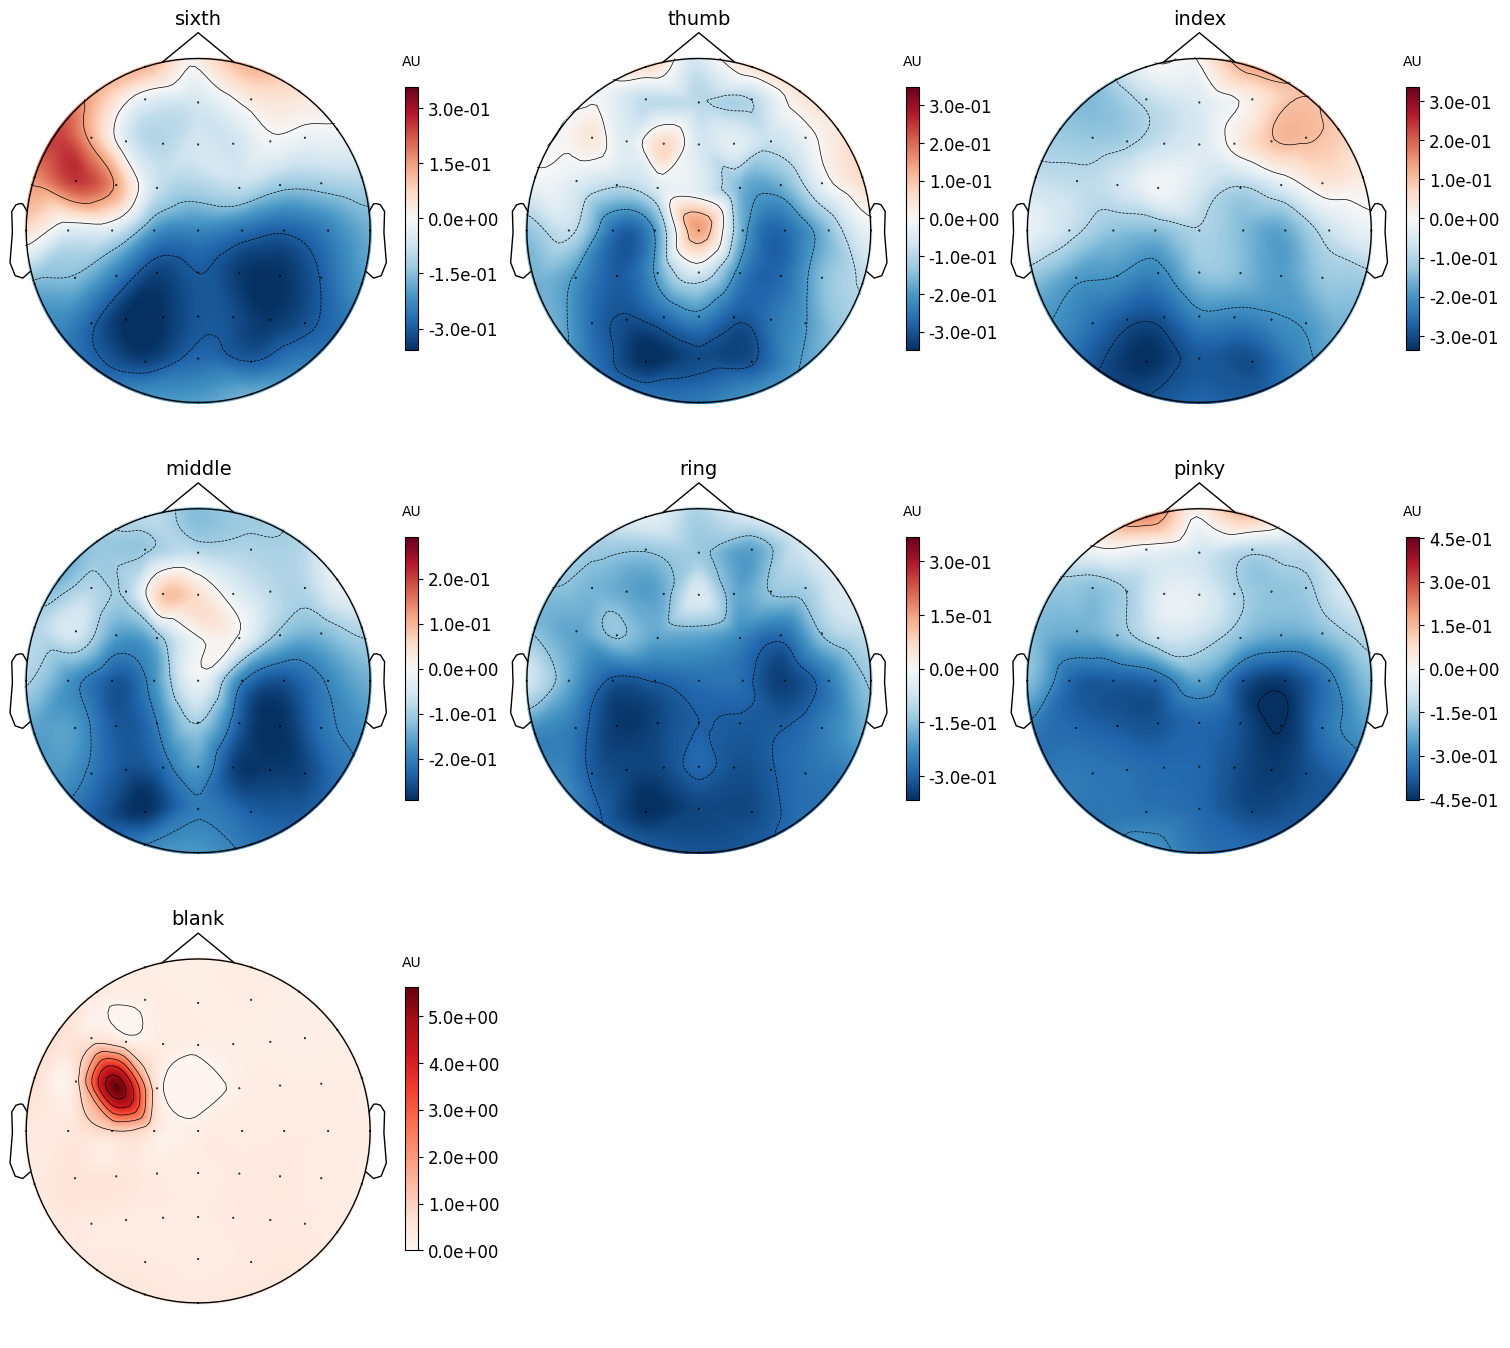

Text(0.5, 0.98, 'Analysis')

In [263]:

tmin, tmax = -epoch_pre_stimulus_seconds, epoch_post_stimulus_seconds
picks = mne.pick_channels(raw_data.ch_names, include=focus_channel_names)
# Reduce memory by not preloading epochs initially if RAM is an issue

epochs = mne.Epochs(raw_data, events, event_id, tmin=tmin-0.5, tmax=tmax+0.5, 
                     baseline=None, preload=True, verbose=False)
epochs.drop_channels(['FT9', 'TP9', 'FT10', 'TP10'])  # Drop channels that are not needed

# freqs = np.arange(bandpass_low, bandpass_high)
freqs = np.logspace(*np.log10([bandpass_low, bandpass_high]), num=10)

baseline = (-epoch_pre_stimulus_seconds, 0)
tfr = epochs.compute_tfr(
    freqs=freqs, n_cycles=freqs, return_itc=False, average=False,
    method='multitaper', use_fft=True, verbose=False
)
tfr.crop(tmin=tmin, tmax=tmax).apply_baseline(baseline=baseline, mode='percent', verbose=False)

tfr_df = tfr.copy().to_data_frame()


fig, axes = plot_tfr_topomaps_by_condition(tfr, topomap_kw={'tmin': 0, 'tmax': 2, 'fmin': 8.0, 'fmax': 30.0, "vlim": (-1,1)}, unify_color_scale=False)
fig.suptitle("Analysis", fontsize=20)

### Getting a Closer look at the results

Doing analysis using moving average with dB Correction method since it has low variance of ERD values across channels and conditions.

In [264]:
results = calculate_erd_for_all_markers(
        data_df,
        markers_df,
        erd_calculator,
        method="moving_average", 
        moving_average_window_size=75,  # Custom window size in samples
        moving_average_method='db_correction',  # Use % ERD calculation  
    )
results_df = pd.DataFrame(results)

Starting ERD calculation for 135 markers...
Finished ERD calculation. Successfully processed 135 epochs.


Classifying the data into two main categories: Rest and Non-Rest.

In [265]:
results_df['label'] = results_df['stimulus'].apply(lambda x: 'Rest' if x == 7 else 'Non-Rest')
rest_results = results_df[results_df['label'] == 'Rest']
non_rest_results = results_df[results_df['label'] == 'Non-Rest']

Get the mean ERD values accross time for the `rest` condition.

In [266]:
mean_erd_values = []
for i in range(rest_results['erds'].iloc[0,].shape[0]):
    erd = []
    for j, erds_array in enumerate(rest_results['erds']):
        erd.append(erds_array[i])
    mean_erd_values.append(np.mean(erd))

Plotting the mean ERD values

Text(0, 0.5, 'Mean ERD Value')

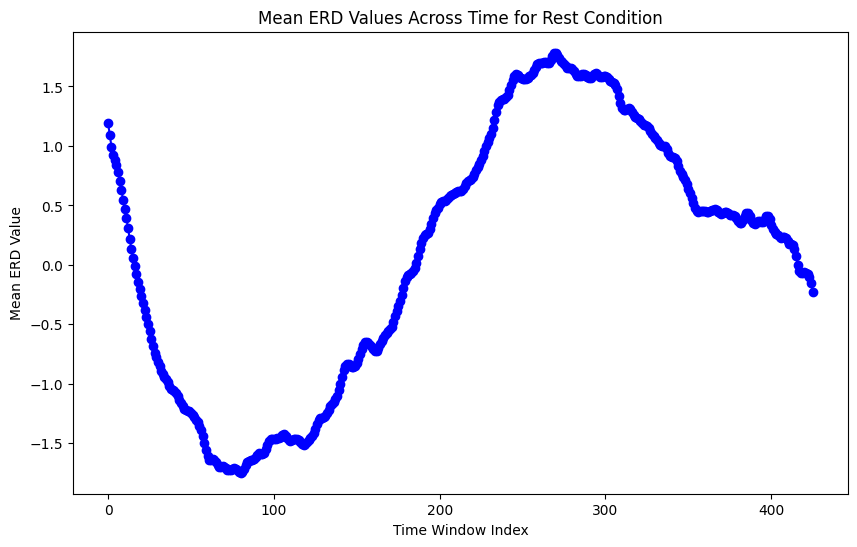

In [267]:
plt.figure(figsize=(10, 6))
plt.plot(mean_erd_values, marker='o', linestyle='-', color='b')
plt.title('Mean ERD Values Across Time for Rest Condition')
plt.xlabel('Time Window Index')
plt.ylabel('Mean ERD Value')


Get the mean ERD values accross time for the `non-rest` condition.

In [268]:
mean_erd_values = []
for i in range(non_rest_results['erds'].iloc[0,].shape[0]):
    erd = []
    for j, erds_array in enumerate(non_rest_results['erds']):
        erd.append(erds_array[i])
    mean_erd_values.append(np.mean(erd))

Plotting the mean ERD values

Text(0, 0.5, 'Mean ERD Value')

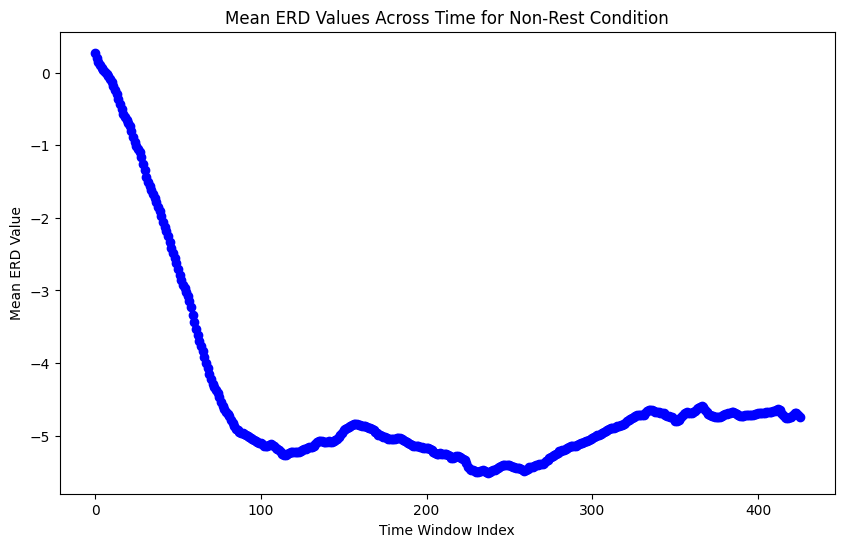

In [269]:
plt.figure(figsize=(10, 6))
plt.plot(mean_erd_values, marker='o', linestyle='-', color='b')
plt.title('Mean ERD Values Across Time for Non-Rest Condition')
plt.xlabel('Time Window Index')
plt.ylabel('Mean ERD Value')

We can see from the two plots that we see the clearest ERD/ERS effects in the second half of the epoch. Thus, we can do more analysis only considering the second half of the epoch.

### New ERDCalculator Subclass

This subclass modifies the calculate_erd_moving_average method so that only the second half of the post-stimulus window is used to calculate ERD, which can be useful if early post-stimulus effects are noisy or irrelevant.

In [270]:
class NewERDCalculator(ERDCalculator):
    def __init__(self, sfreq, samples_after_marker, samples_before_marker, bandpass_low, bandpass_high, focus_channels, focus_channels_indices):
        # Initialize the base ERDCalculator class with all provided parameters
        super().__init__(sfreq, samples_after_marker, samples_before_marker, bandpass_low, bandpass_high, focus_channels, focus_channels_indices)
    
    def calculate_erd_moving_average(self, epoch_data, window_size_samples, return_mean=True, method='percentage'):
        """
        Calculates ERD using a moving average approach with a selectable calculation method.
        Modified from the base class to only consider the second half of the post-stimulus window.

        Args:
            epoch_data (np.array): EEG data for one epoch (shape: [channels x samples]).
            window_size_samples (int): Number of samples in each moving average window.
            return_mean (bool): If True, returns mean ERD of focus channels.
                                If False, returns dict of ERD per channel.
            method (str): ERD method - 'percentage' or 'db_correction'.

        Returns:
            If return_mean=True: (float, np.ndarray) tuple with average ERD and per-window ERD timeline.
            If return_mean=False: dict of per-channel ERD values.
        """
        # Step 1: Preprocess (filter + CAR)
        processed_epoch = self._preprocess_epoch(epoch_data)
        if processed_epoch is None:
            return None

        # Step 2: Extract pre- and post-stimulus windows
        pre_stimulus_data = processed_epoch[:, :self.samples_before_marker]
        post_stimulus_data = processed_epoch[:, self.samples_before_marker:]

        pre_len, post_len = pre_stimulus_data.shape[1], post_stimulus_data.shape[1]

        # Step 3: Validate window size
        if not (0 < window_size_samples <= pre_len and window_size_samples <= post_len):
            print(f"Window size ({window_size_samples}) is invalid for pre ({pre_len}) or post ({post_len}) data lengths.")
            return None

        # Step 4: Compute number of moving windows
        num_windows = min(pre_len, post_len) - window_size_samples + 1
        if num_windows <= 0:
            print("Not enough samples to form any full window pairs.")
            return None

        # Initialize container for per-channel ERD values per window
        all_window_erds = np.full((self.channel_count, num_windows), np.nan)

        # Step 5: Loop over windows to calculate ERD
        for i in range(num_windows):
            pre_power = np.mean(pre_stimulus_data[:, i:i + window_size_samples]**2, axis=1)
            post_power = np.mean(post_stimulus_data[:, i:i + window_size_samples]**2, axis=1)

            if method == 'percentage':
                erd_window = self._compute_erd_percentage(pre_power, post_power)
            elif method == 'db_correction':
                erd_window = self._compute_erd_db(pre_power, post_power)
            else:
                print(f"Invalid method '{method}'. Please choose 'percentage' or 'db'.")
                return None

            all_window_erds[:, i] = erd_window

        # Step 6: Focus on second half of the post-stimulus window only
        second_half_start = (self.samples_after_marker // 2)
       
        all_window_erds = all_window_erds[:, second_half_start:]

        # Step 7: Compute average ERD across the selected portion
        mean_erd_all_channels = np.nanmean(all_window_erds, axis=1)
        erd_focus_values = mean_erd_all_channels[self.focus_channels_indices]

        # Step 8: Handle edge case where all values are NaN
        if np.all(np.isnan(erd_focus_values)):
            print("No valid ERD values could be calculated from any moving window.")
            return None

        # Step 9: Return results in desired format
        if return_mean:
           
            return np.nanmean(erd_focus_values), all_window_erds[self.focus_channels_indices, :].mean(axis=0)
        else:
            return {self.channel_names[i]: mean_erd_all_channels[i] for i in range(len(self.channel_names))}


### Analysis using the new ERDCalculator subclass

In [271]:
erd_calculator_new = NewERDCalculator(
    sfreq,
    epoch_post_stimulus_seconds,
    epoch_pre_stimulus_seconds,
    bandpass_low,
    bandpass_high,
    [i for i in channel_names if i not in bad_channels],
    focus_channels_indices
)

In [272]:
results = calculate_erd_for_all_markers(
            data_df,
            markers_df,
            erd_calculator_new,
           
            method="moving_average",
            moving_average_window_size=75,        # Custom window size in samples
            moving_average_method='percentage',   # Use % ERD calculation
        )

results_df = pd.DataFrame(results)

summary_df = get_summary(results_df, 0, target_value='erd_value')
print(summary_df.to_string(index=False))
print("Total: ", summary_df['Count'].apply(lambda x: int(x.split('/')[0])).sum())

Starting ERD calculation for 135 markers...
Finished ERD calculation. Successfully processed 135 epochs.
Category    Mean Std Dev          Count
      NT -58.453  21.017 41/45 (91.11%)
      ST -57.333  19.576 41/45 (91.11%)
    Rest 267.714 436.785 32/45 (71.11%)
Total:  114


### Combining different methods

Reverting back to the original ERDCalculator class, now we see if we can get better results by combining two different methods for the rest and non-rest conditions.

In [273]:

erd_calculator = ERDCalculator(
    sfreq,
    epoch_post_stimulus_seconds,
    epoch_pre_stimulus_seconds,
    bandpass_low,
    bandpass_high,
    [i for i in channel_names if i not in bad_channels],
    focus_channels_indices
)


This code:

* Runs two ERD analyses using **different window sizes** (2s and 200ms)
* Merges their results by epoch
* Calculates a **boundary threshold** using Rest trials (from the fine-grained view)
* Compares and summarizes ERD statistics across categories (`NT`, `ST`, `Rest`)
* Finally, it creates a **hybrid summary**: uses coarse-window ERD for `NT`/`ST`, but 200ms-based thresholding for `Rest`


In [274]:
# --- Step 1: Run ERD analysis with a 2-second moving average window ---
results1 = calculate_erd_for_all_markers(
    data_df,
    markers_df,
    erd_calculator,
    method="moving_average",
    moving_average_window_size=500,  # Full 2-second epoch (coarse view)
    moving_average_method='percentage',
)
results1_df = pd.DataFrame(results1)
results1_df = results1_df.reset_index().rename(columns={'index': 'epoch'})  # Add epoch index

# --- Step 2: Run ERD analysis with a 200ms moving average window ---
results2 = calculate_erd_for_all_markers(
    data_df,
    markers_df,
    erd_calculator,
    method="moving_average",
    moving_average_window_size=50,  # Finer-grained 200ms window
    moving_average_method='percentage',
)
results2_df = pd.DataFrame(results2)
results2_df = results2_df.reset_index().rename(columns={'index': 'epoch'})

# --- Step 3: Merge both DataFrames on epoch and stimulus for comparison ---
results_df = pd.merge(results1_df, results2_df, on=['epoch', 'stimulus'], suffixes=('_2s', '_200ms'))

# --- Step 4: Add metadata and compute derived features ---
results_df['label'] = results_df['stimulus'].apply(lambda x: 'Rest' if x == 7 else 'Non-Rest')
results_df['sum_erds'] = results_df['erds_200ms'].apply(lambda x: np.sum(x) if isinstance(x, np.ndarray) else None)

# --- Step 5: Summary using 2s ERD (baseline analysis) ---
print("\n--- Method 3 ERD Analysis Summary ---")
summary_df1 = get_summary(results_df, 0, target_value='erd_value_2s')  # Static boundary at 0
print(summary_df1.to_string(index=False))
print("Total: ", summary_df1['Count'].apply(lambda x: int(x.split('/')[0])).sum())
# --- Step 6: Compute dynamic boundary from Rest epochs using finer ERD ---
boundary = results_df[
    (results_df['label'] == 'Rest') &
    (results_df['erd_value_200ms'].between(-100, 100))
]['sum_erds'].mean()
print(f"\n--- Boundary for Rest ERD: {boundary:.3f} ---")

# --- Step 7: Summary using 200ms summed ERDs and dynamic boundary ---
summary_df2 = get_summary(results_df, boundary, target_value='sum_erds')
print("\n--- Method 2 ERD Analysis Summary ---")
print(summary_df2.to_string(index=False))
print("Total: ", summary_df2['Count'].apply(lambda x: int(x.split('/')[0])).sum())
# --- Step 8: Create hybrid summary — use Method 2 Rest analysis, Method 1 for everything else ---
summary_df3 = pd.concat([
    summary_df1[summary_df1['Category'] != 'Rest'],
    summary_df2[summary_df2['Category'] == 'Rest']
], ignore_index=True)
print("\n--- Method 3 ERD Analysis Summary ---")
print(summary_df3.to_string(index=False))
print("Total: ", summary_df3['Count'].apply(lambda x: int(x.split('/')[0])).sum())


Starting ERD calculation for 135 markers...
Finished ERD calculation. Successfully processed 135 epochs.
Starting ERD calculation for 135 markers...
Finished ERD calculation. Successfully processed 135 epochs.

--- Method 3 ERD Analysis Summary ---
Category    Mean Std Dev          Count
      NT -58.634  17.960 43/45 (95.56%)
      ST -59.969  15.278 44/45 (97.78%)
    Rest 256.774 722.517 24/45 (53.33%)
Total:  111

--- Boundary for Rest ERD: 1368.147 ---

--- Method 2 ERD Analysis Summary ---
Category       Mean    Std Dev          Count
      NT -20967.376   9138.595 35/45 (77.78%)
      ST -18543.226   9467.309 41/45 (91.11%)
    Rest 194672.584 530441.726 30/45 (66.67%)
Total:  106

--- Method 3 ERD Analysis Summary ---
Category       Mean    Std Dev          Count
      NT    -58.634     17.960 43/45 (95.56%)
      ST    -59.969     15.278 44/45 (97.78%)
    Rest 194672.584 530441.726 30/45 (66.67%)
Total:  117


### Plotting the distribution of ERD values

In [275]:
results = calculate_erd_for_all_markers(
    data_df,
    markers_df,
    erd_calculator_new,
    method="moving_average",
    moving_average_window_size=75,  # Custom window size in samples
    moving_average_method='percentage',  # Use % ERD calculation
)
results_df = pd.DataFrame(results)

results_df['label'] = results_df['stimulus'].apply(lambda x: 'Rest' if x == 7 else 'Non-Rest')
rest_results = results_df[results_df['label'] == 'Rest']
non_rest_results = results_df[results_df['label'] == 'Non-Rest']

Starting ERD calculation for 135 markers...
Finished ERD calculation. Successfully processed 135 epochs.


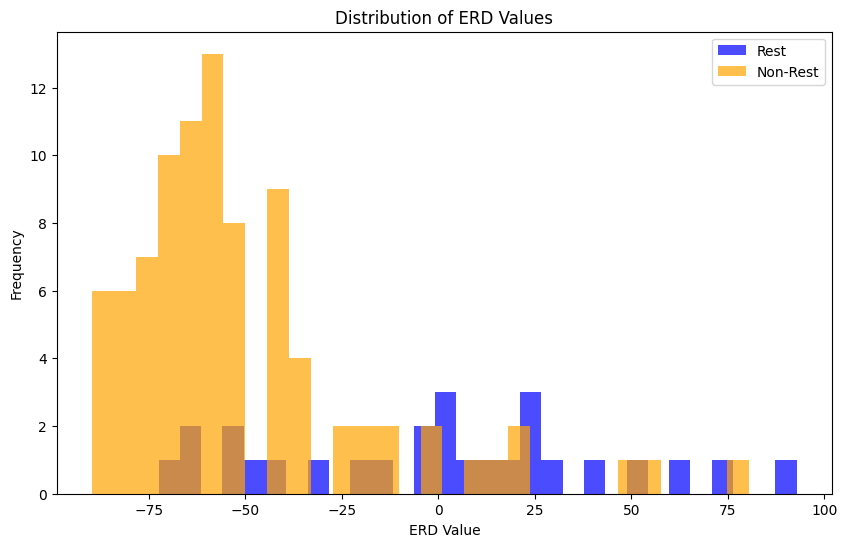

In [276]:
plt.figure(figsize=(10, 6))
plt.hist(rest_results[rest_results['erd_value'].between(-100, 100)]['erd_value'], bins=30, alpha=0.7, label='Rest', color='blue')
plt.hist(non_rest_results[non_rest_results['erd_value'].between(-100, 100)]['erd_value'], bins=30, alpha=0.7, label='Non-Rest', color='orange')
plt.title('Distribution of ERD Values')
plt.xlabel('ERD Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Plotting the distribution of ERD values in each window

In [277]:
erd_vstack = np.vstack(rest_results['erds'].values)
erd_vstack.shape

(45, 176)

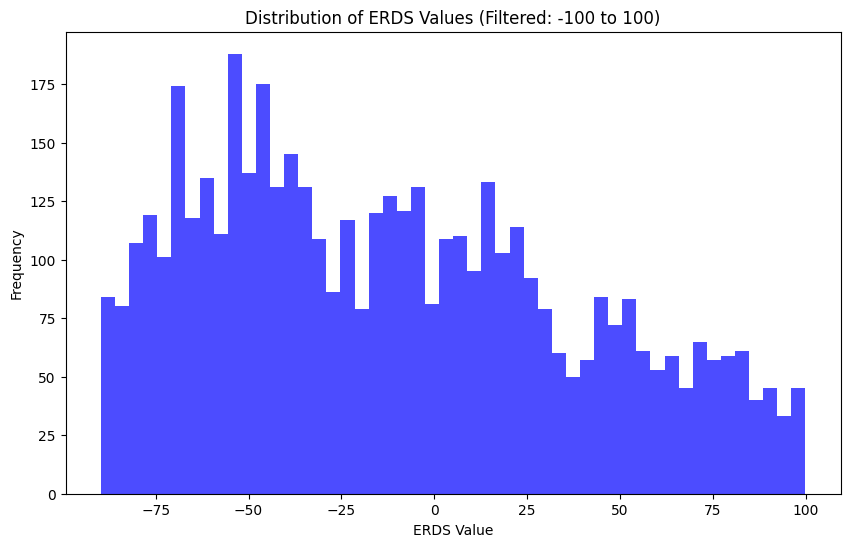

Original data points: 7920
Filtered data points: 4771
Percentage of data kept: 60.24%


In [278]:
# Filter values between -100 and 100
erd_flattened = erd_vstack.flatten()
erd_filtered = erd_flattened[(erd_flattened >= -100) & (erd_flattened <= 100)]
plt.figure(figsize=(10, 6))
plt.hist(erd_filtered, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of ERDS Values (Filtered: -100 to 100)')
plt.xlabel('ERDS Value')
plt.ylabel('Frequency')
plt.show()

print(f"Original data points: {len(erd_flattened)}")
print(f"Filtered data points: {len(erd_filtered)}")
print(f"Percentage of data kept: {len(erd_filtered)/len(erd_flattened)*100:.2f}%")

In [279]:
erd_vstack = np.vstack(non_rest_results['erds'].values)
erd_vstack.shape

(90, 176)

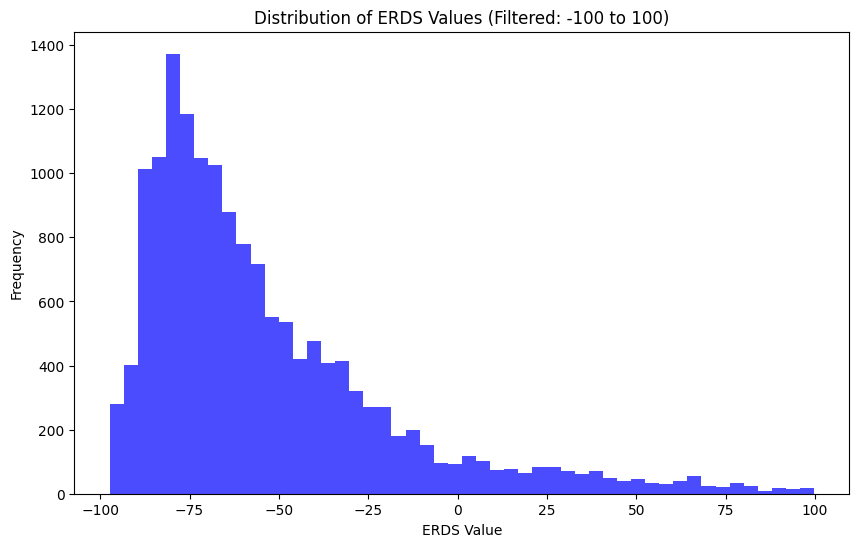

Original data points: 15840
Filtered data points: 15417
Percentage of data kept: 97.33%


In [280]:
# Filter values between -100 and 100
erd_flattened = erd_vstack.flatten()
erd_filtered = erd_flattened[(erd_flattened >= -100) & (erd_flattened <= 100)]

plt.figure(figsize=(10, 6))
plt.hist(erd_filtered, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of ERDS Values (Filtered: -100 to 100)')
plt.xlabel('ERDS Value')
plt.ylabel('Frequency')
plt.show()

print(f"Original data points: {len(erd_flattened)}")
print(f"Filtered data points: {len(erd_filtered)}")
print(f"Percentage of data kept: {len(erd_filtered)/len(erd_flattened)*100:.2f}%")